# Capstone Project: Airbnb Prediciting Prices 
____

In [135]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for NPL and Regex
import missingno as msno
import folium
#import re
#from nltk.tokenize import RegexpTokenizer # sent_tokenize, word_tokenize, 


In [136]:
# Reading dataset
listing = pd.read_csv('../data/listing_eda.csv')

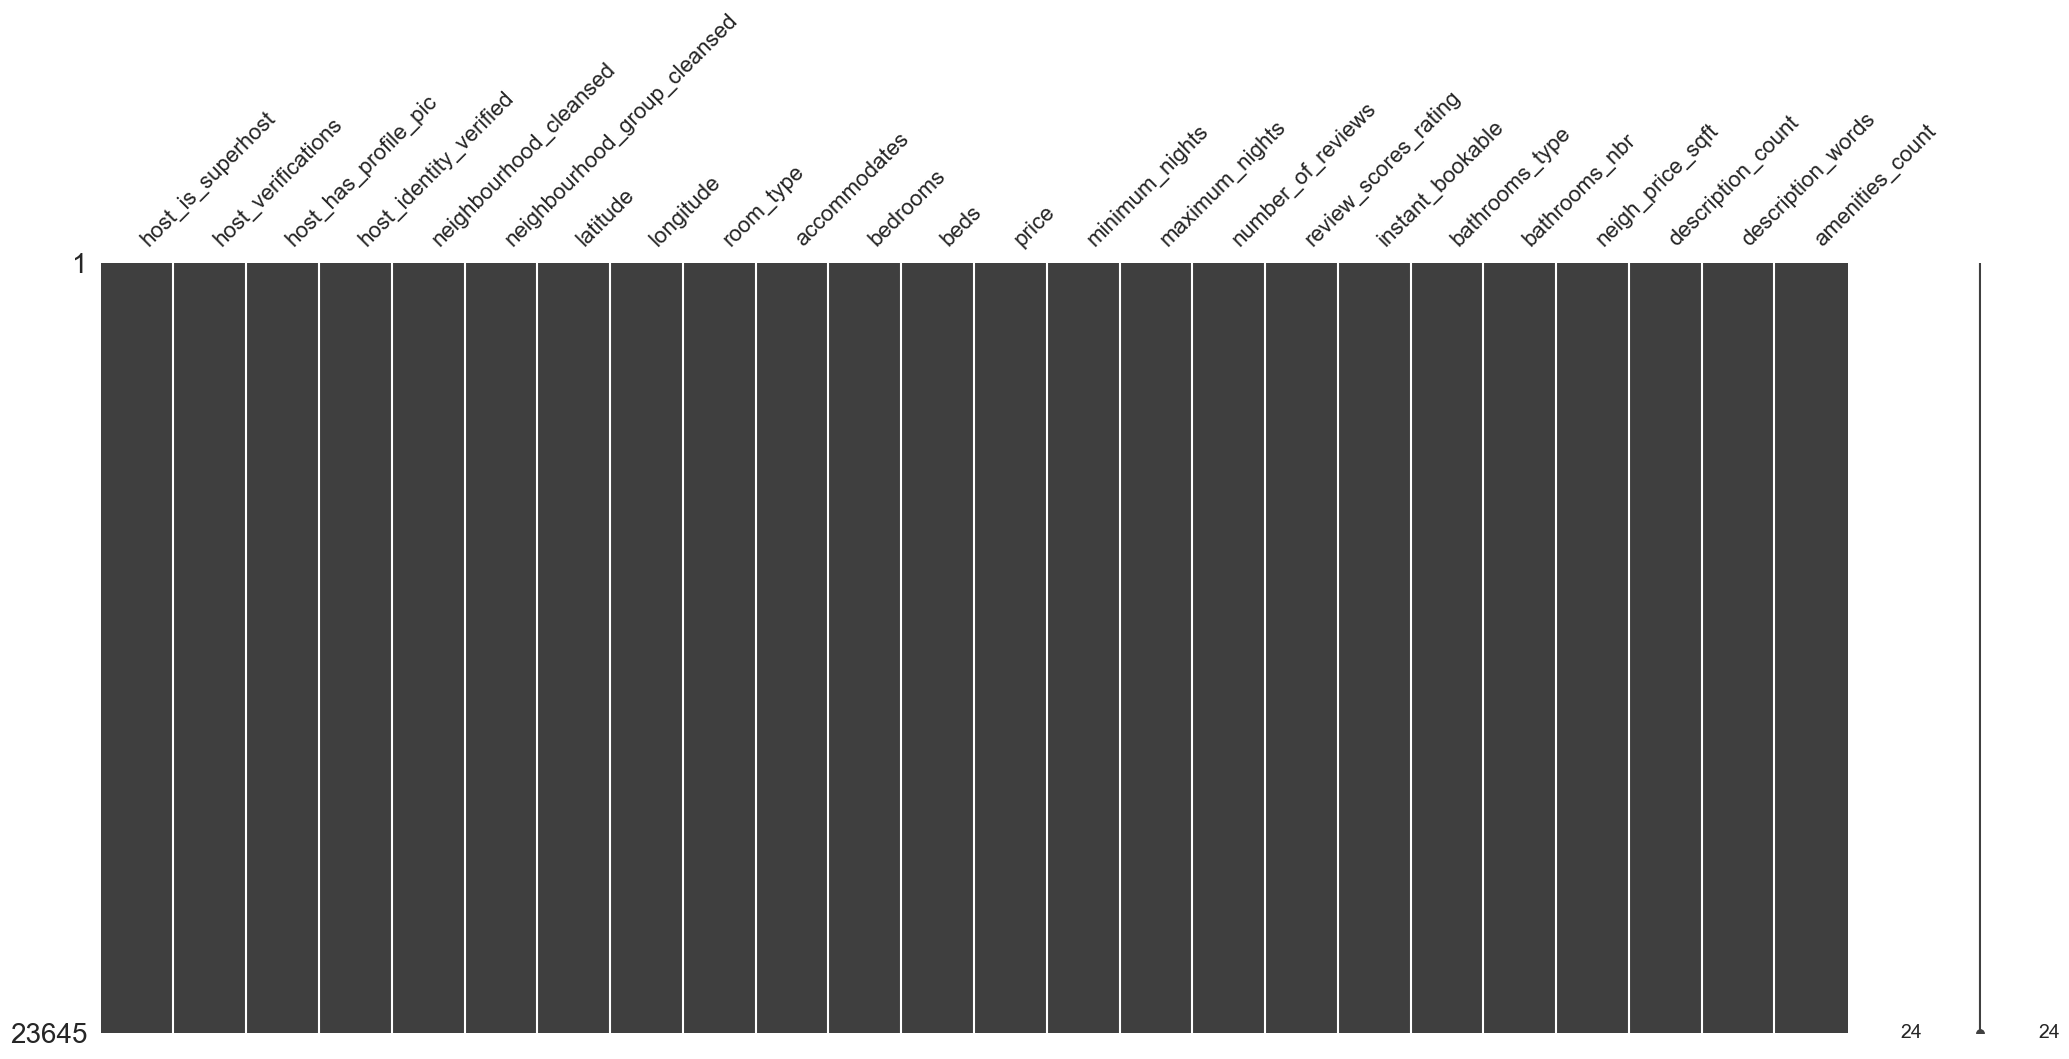

In [137]:
msno.matrix(listing);

In [138]:
listing.shape

(23645, 24)

In [139]:
listing.columns

Index(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'bathrooms_type', 'bathrooms_nbr',
       'neigh_price_sqft', 'description_count', 'description_words',
       'amenities_count'],
      dtype='object')

In [140]:
object_col = listing.select_dtypes(include='object')

In [141]:
lis_neigh = listing['neighbourhood_cleansed'].value_counts()

In [142]:
for c in object_col.columns:

    print('------  VALUE COUNTS ------------------')
    print(f'Column name: {c}')
    print(listing[c].value_counts())
    print('----------------------------------------')

------  VALUE COUNTS ------------------
Column name: host_verifications
['email', 'phone']                  18664
['email', 'phone', 'work_email']     2980
['phone']                            1893
['phone', 'work_email']                68
['email']                              30
[]                                      8
None                                    2
Name: host_verifications, dtype: int64
----------------------------------------
------  VALUE COUNTS ------------------
Column name: neighbourhood_cleansed
bedford-stuyvesant    2181
williamsburg          1885
bushwick              1234
upper west side       1049
hell's kitchen        1012
                      ... 
eltingville              2
south beach              2
castle hill              2
westerleigh              1
woodrow                  1
Name: neighbourhood_cleansed, Length: 154, dtype: int64
----------------------------------------
------  VALUE COUNTS ------------------
Column name: neighbourhood_group_cleansed
Br

In [143]:
listing.head(3)

,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,...,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,bathrooms_type,bathrooms_nbr,neigh_price_sqft,description_count,description_words,amenities_count
0,0,"['email', 'phone']",1,1,kensington,Brooklyn,40.64529,-73.97238,Private room,2,...,730,9,4.89,0,shared,1.0,2.77,165,"['Renovated', 'apt', 'home', 'in', 'elevator',...",557
1,1,"['email', 'phone']",1,1,bedford-stuyvesant,Brooklyn,40.68535,-73.95512,Private room,2,...,730,50,4.52,0,private,0.0,2.83,447,"['One', 'room', 'available', 'for', 'rent', 'i...",77
2,0,"['email', 'phone']",1,1,ridgewood,Queens,40.70309,-73.89963,Entire home/apt,16,...,730,13,4.42,0,private,2.5,2.73,333,"['he', 'spaceAlso', 'provided', 'are', 'all', ...",323


In [144]:
listing.tail(3)

,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,...,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,bathrooms_type,bathrooms_nbr,neigh_price_sqft,description_count,description_words,amenities_count
23642,1,"['email', 'phone']",1,0,west village,Manhattan,40.742850,-74.028400,Entire home/apt,8,...,30,25,4.92,0,private,1.0,7.68,468,"['Welcome', 'to', 'my', 'Beautiful', '3', 'Bed...",575
23643,0,"['email', 'phone']",1,1,west village,Manhattan,40.739967,-74.031677,Private room,6,...,1125,3,5.00,0,private,1.0,7.68,91,"['LOCATION', 'LOCATION', 'LOCATION', 'Extremel...",265
23644,1,"['email', 'phone', 'work_email']",1,1,upper west side,Manhattan,40.784590,-74.012530,Entire home/apt,4,...,1125,52,4.79,0,private,1.0,5.53,170,"['Our', 'apartment', 'is', 'straight', 'across...",602


# 2. Exploratory Data Analysis
_____

## 2.1. Checking for outliers

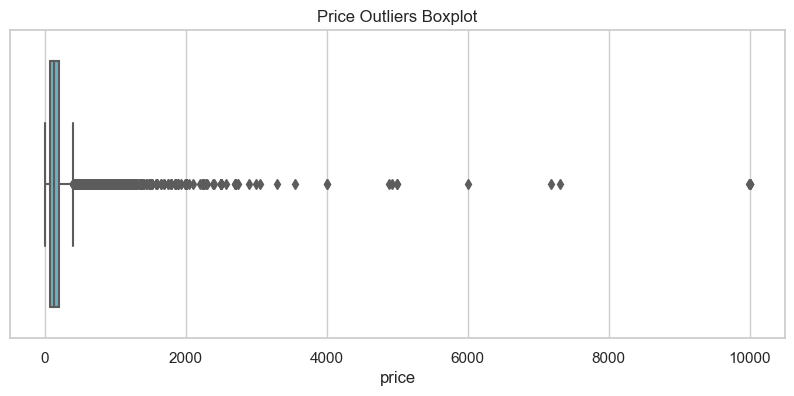

In [145]:
# Plotting Boxplot
plt.figure(figsize = (10, 4))
plt.title('Price Outliers Boxplot')
sns.boxplot(x = listing['price'], color = 'c');

In [146]:
listing.shape

(23645, 24)

In [147]:
#Deleting outliers using quartiles
Q1 = listing['price'].quantile(0.25)
Q3 = listing['price'].quantile(0.75)
IQR = Q3 - Q1
listing.drop(listing[listing['price'] < (Q1 - 1.5 * IQR)].index, inplace=True)   
listing.drop(listing[listing['price'] > (Q3 + 1.5 * IQR)].index, inplace=True)
listing.shape


(22183, 24)

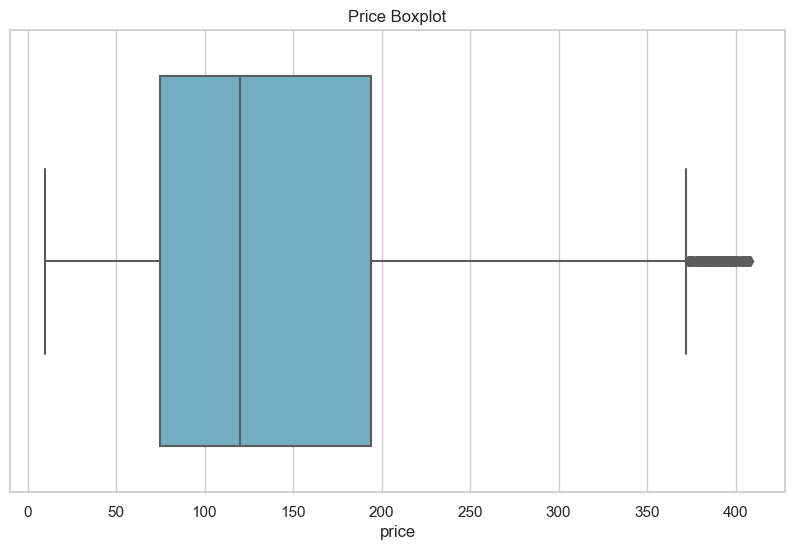

In [148]:
# Plotting Boxplot
plt.figure(figsize = (10, 6))
plt.title('Price Boxplot')
sns.boxplot(x = listing['price'], color = 'c');

## 2.2. Checking for Correlations

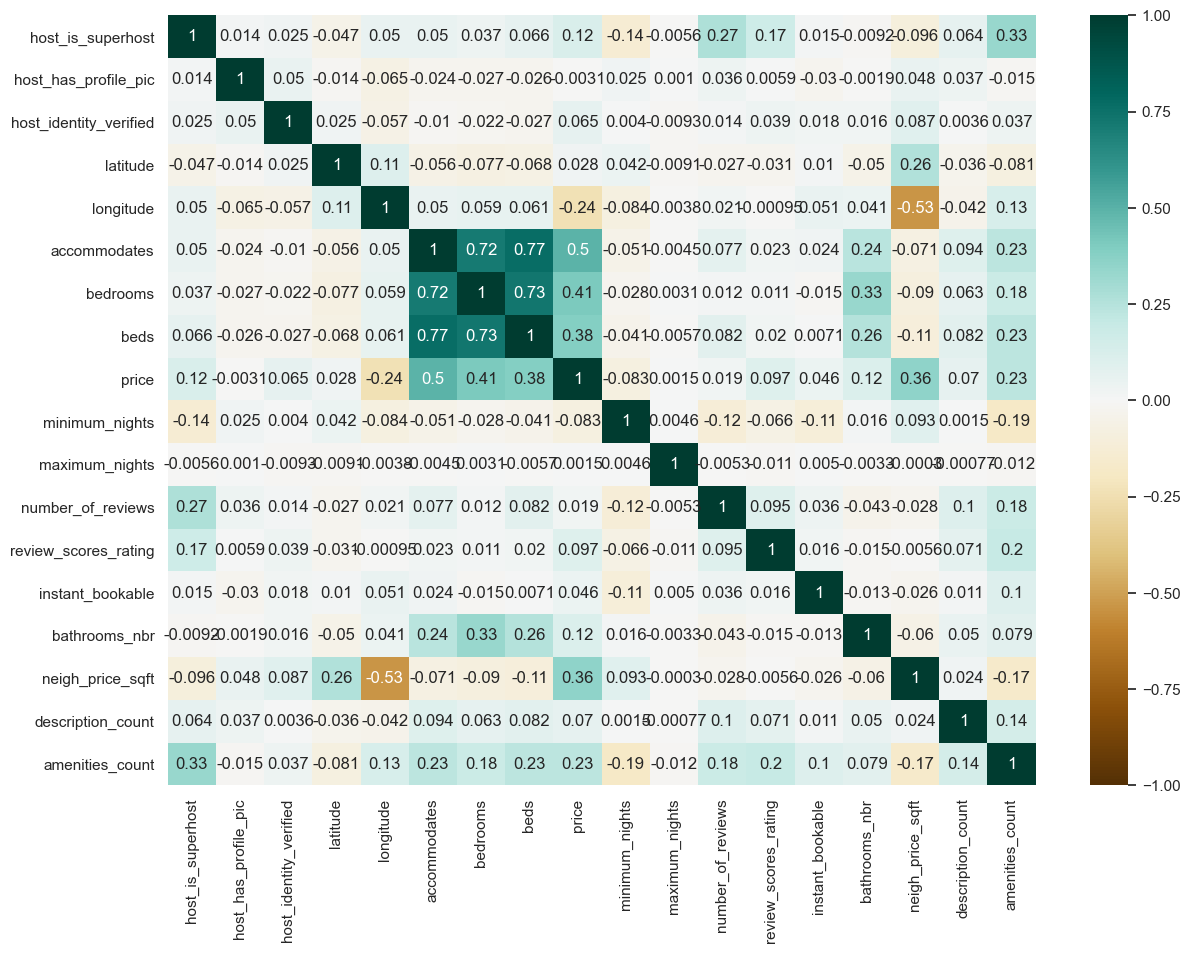

In [149]:
corr_disc = listing.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(corr_disc, annot = True, vmin =-1, vmax = 1, cmap = 'BrBG');

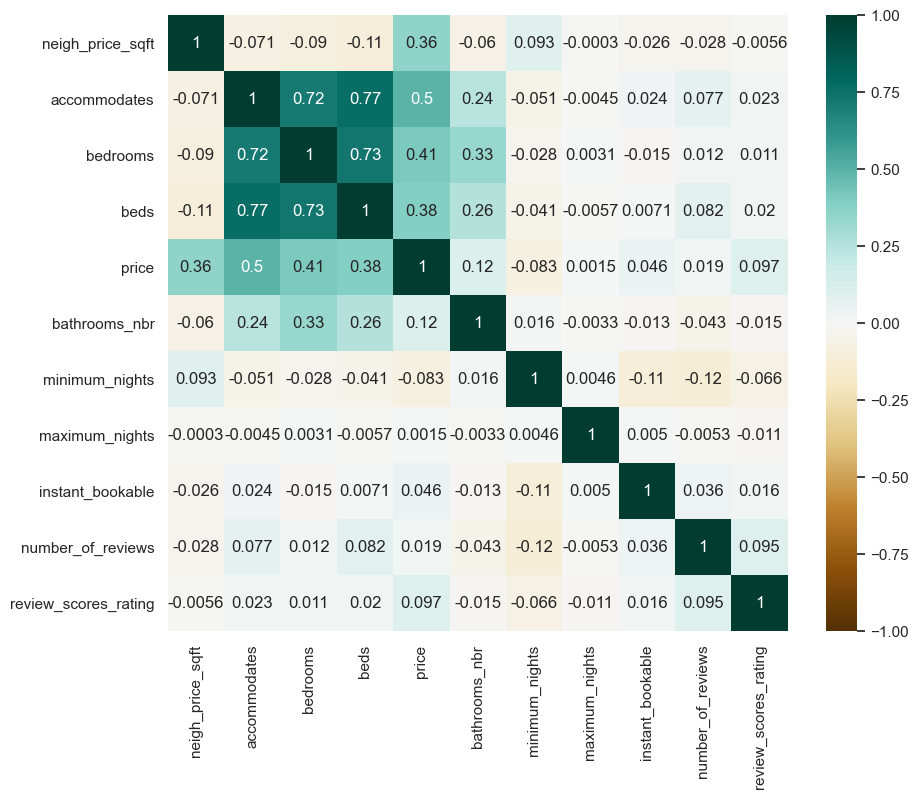

In [108]:
listing_pairs = listing[['neigh_price_sqft','accommodates','neighbourhood_group_cleansed','bedrooms', 'beds', 'price', 'bathrooms_nbr', 'minimum_nights','maximum_nights', 'instant_bookable', 'number_of_reviews', 'review_scores_rating']]
corr_list = listing_pairs.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_list, annot = True, vmin =-1, vmax = 1, cmap = 'BrBG');

## 2.3. Prices Distribution

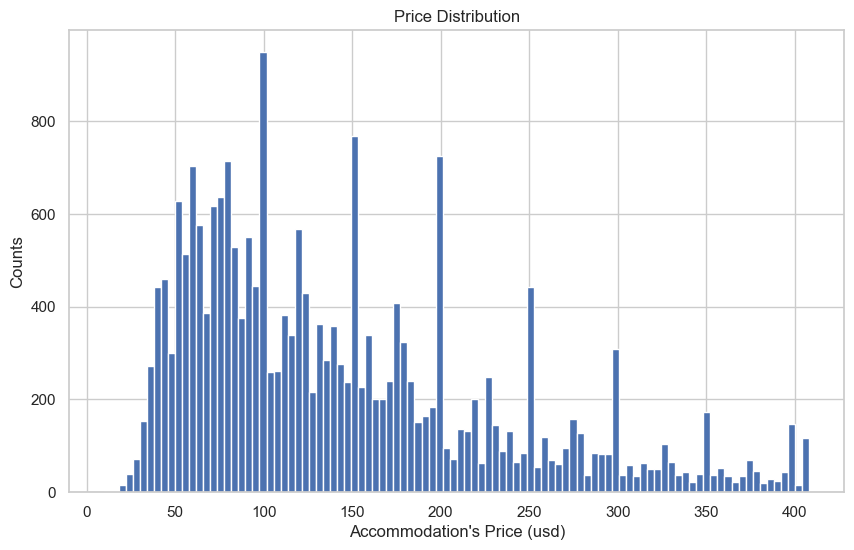

In [109]:
# Histogram 
plt.figure(figsize = (10, 6))
plt.title('Price Distribution')
plt.hist(listing['price'], bins = 100)
plt.xlabel("Accommodation's Price (usd)")
plt.ylabel("Counts");

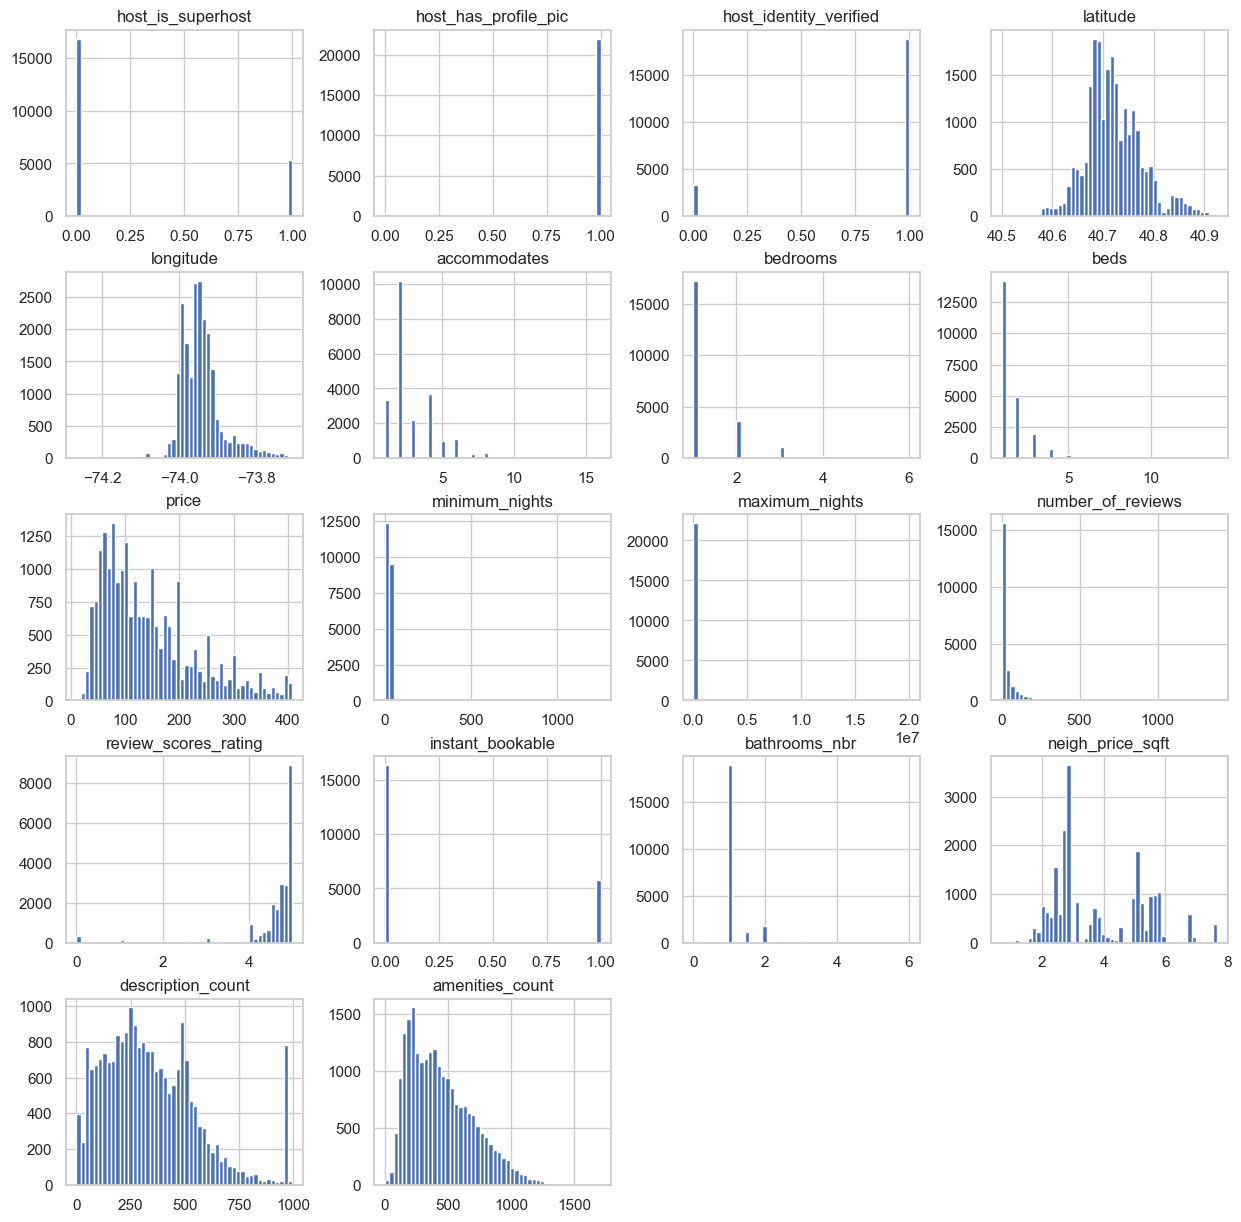

In [110]:
listing.hist(figsize = (15, 15), bins=50);

## 2.4. Barcharts Categories

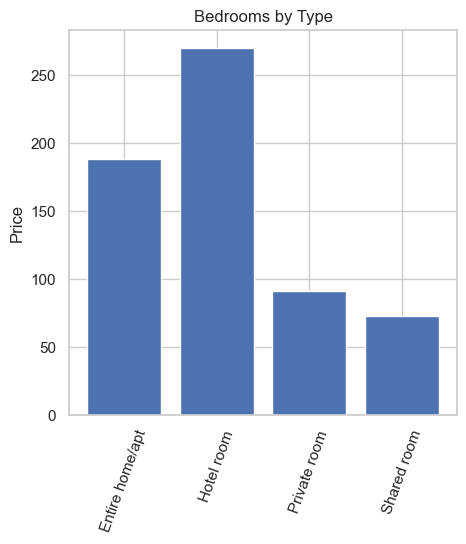

In [111]:
df_bed_tp = listing.groupby(by='room_type').mean()
# Chart
plt.figure(figsize = (5, 5))
plt.bar(df_bed_tp.index, df_bed_tp['price']) ;
plt.title('Bedrooms by Type')
plt.ylabel('Price')
#plt.xlabel('Type ')
plt.xticks(rotation = 70);

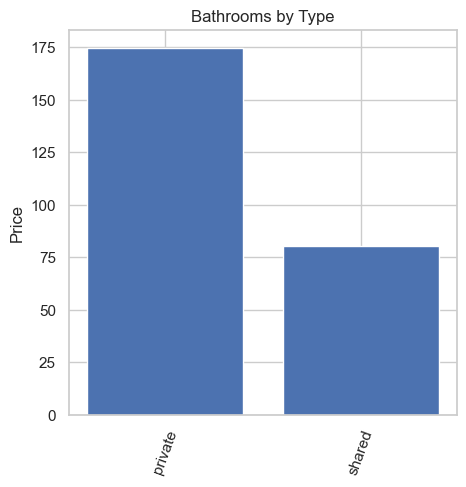

In [112]:
df_room_tp = listing.groupby(by='bathrooms_type').mean()
# Chart
plt.figure(figsize = (5, 5))
#plt.legend('Types')
plt.bar(df_room_tp.index, df_room_tp['price']) ;
plt.title('Bathrooms by Type')
plt.ylabel('Price')
#plt.xlabel('Type  ')
plt.xticks(rotation = 70);

## 2.5. Boxplots 

Boxplot by Neighbourhood

In [113]:
listing.columns

Index(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'bathrooms_type', 'bathrooms_nbr',
       'neigh_price_sqft', 'description_count', 'description_words',
       'amenities_count'],
      dtype='object')

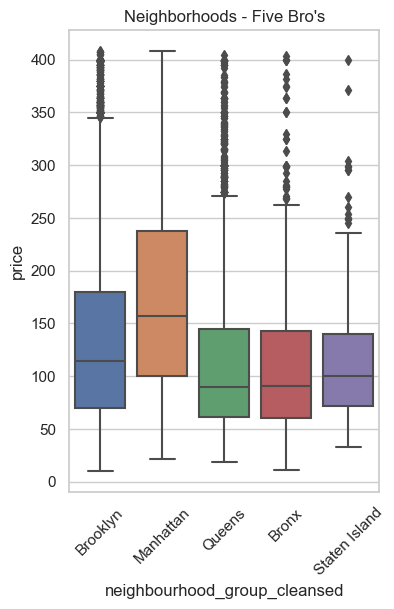

In [114]:
#Plotting Categorical Features and target
plt.figure(figsize = (4, 6))
plt.title("Neighborhoods - Five Bro's")

sns.set(style='whitegrid')
ax = sns.boxplot(x ='neighbourhood_group_cleansed', y ='price', data = listing, )
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

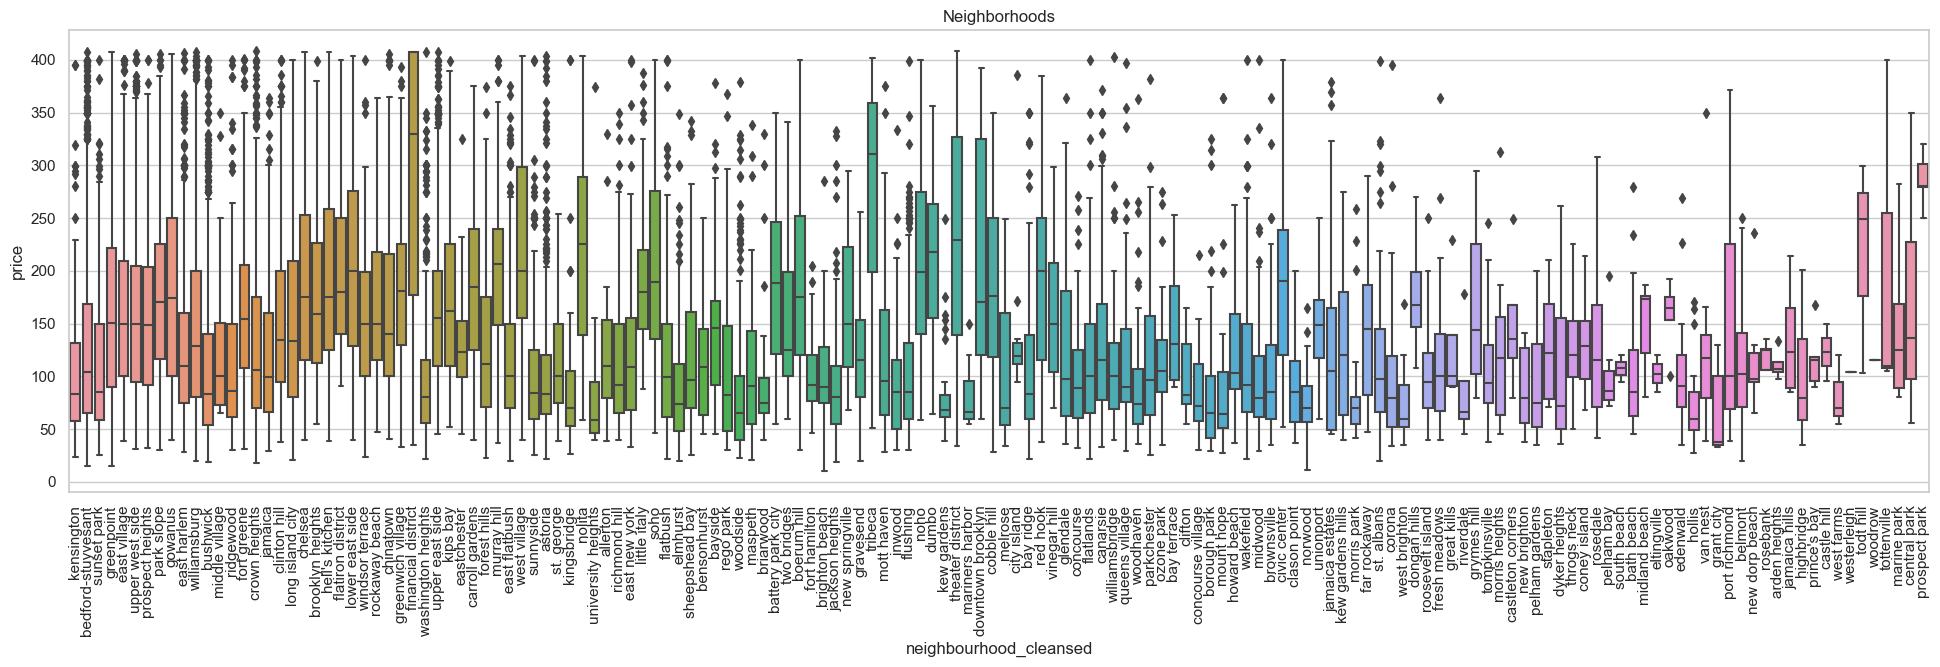

In [115]:
# modify to get 10 Top
#Plotting Categorical Features and target
plt.figure(figsize = (24, 6))
plt.title('Neighborhoods')

sns.set(style='whitegrid')
ax = sns.boxplot(x ='neighbourhood_cleansed', y ='price', data = listing, )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

### 2.5.1 Boxplot for top 10 Neighborhood with Higher Average Price 

In [116]:
df_ = listing.groupby(by='neighbourhood_cleansed').mean().sort_values(by='price' , ascending=False).head(10)

In [117]:
df_.head()
higher_price_hood = list(df_.index)

In [118]:
#df_top_10 = listing[listing['neighbourhood_cleansed'] in higher_price_hood]

In [119]:
df_.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'bathrooms_nbr',
       'neigh_price_sqft', 'description_count', 'amenities_count'],
      dtype='object')

## 2.6. Scatter Plots

Scatter Plot Price

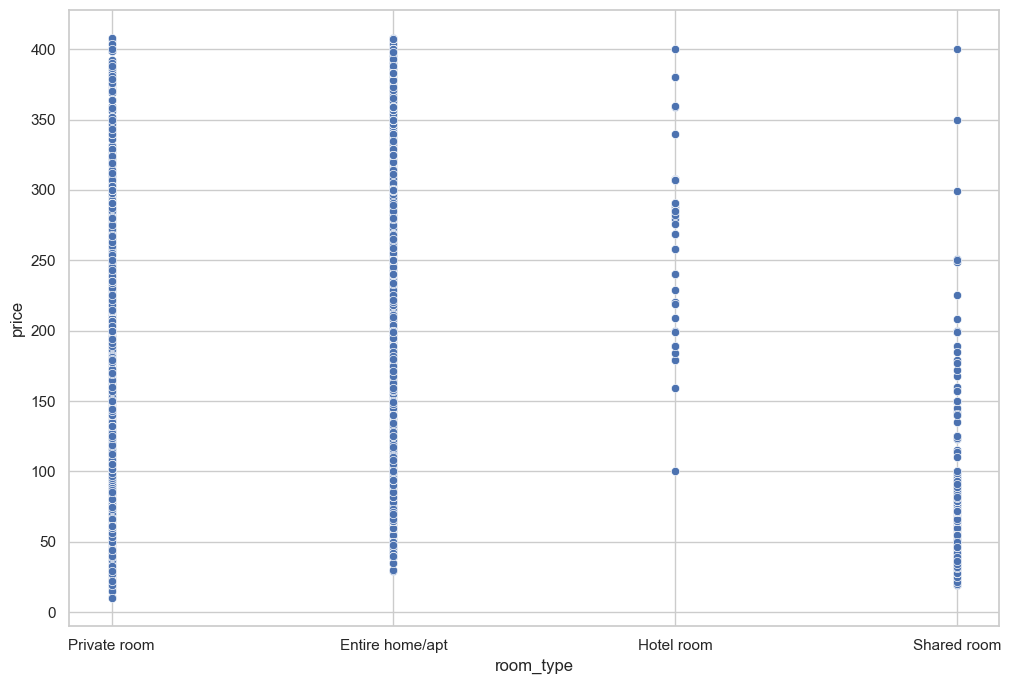

In [120]:
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
sns.scatterplot(x="room_type",
                    y="price",
                    data=listing,
                    
                    );

In [121]:
df_room_type = listing[listing['room_type']=='Shared room']

<Figure size 2500x800 with 0 Axes>

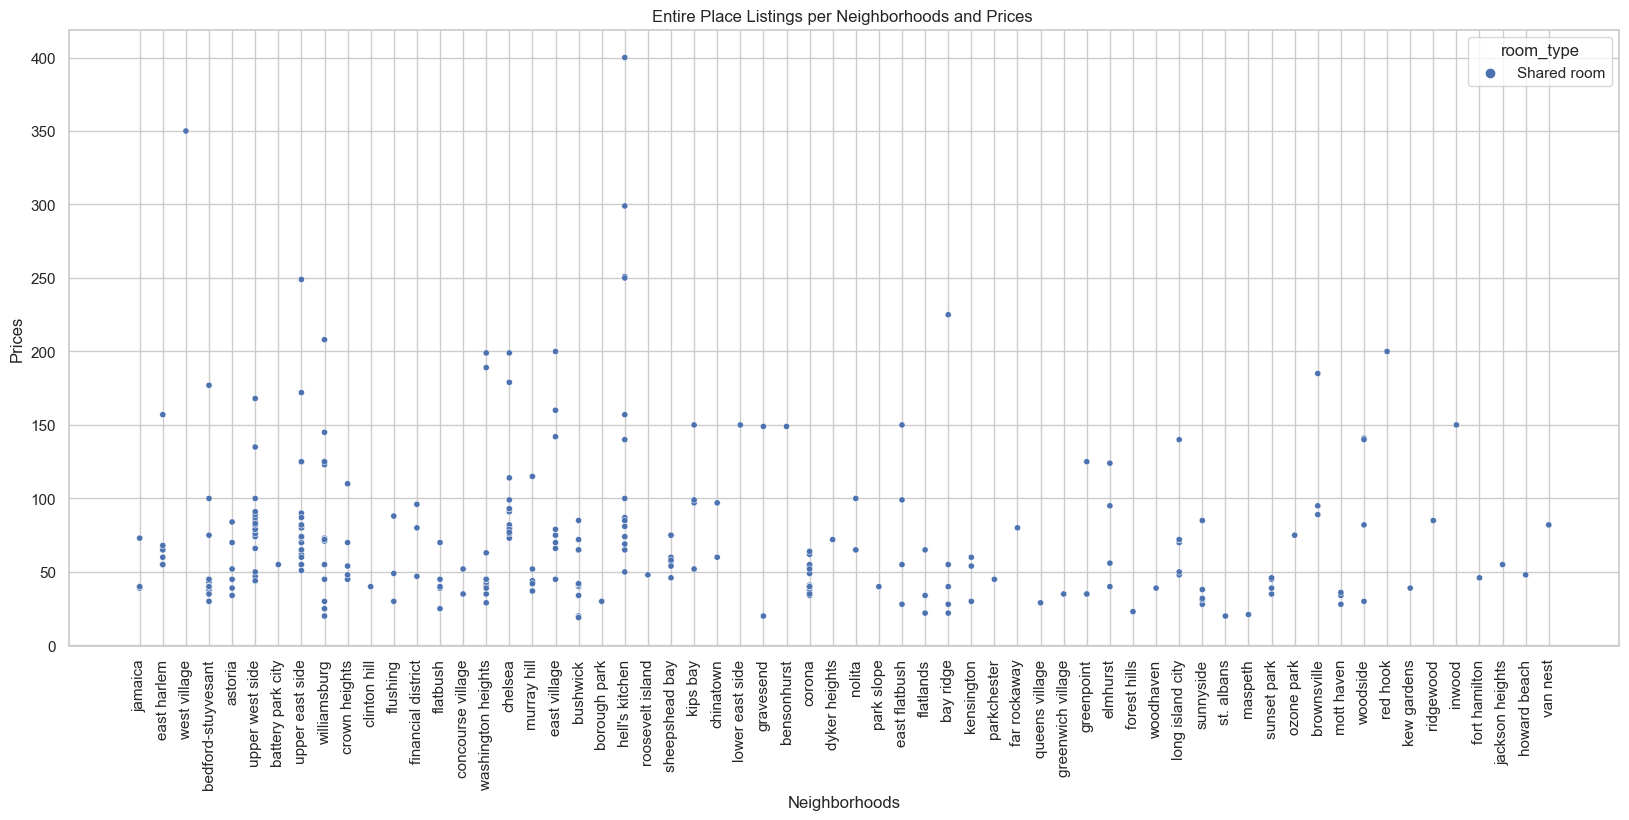

In [122]:
plt.figure(figsize=(25,8))

sns.set(style='whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
ax = sns.scatterplot(x = df_room_type['neighbourhood_cleansed'],
                    y="price",
                    data=df_room_type,
                    hue="room_type", s=20
                    );
ax.tick_params(axis='x', rotation=90)
plt.title("Entire Place Listings per Neighborhoods and Prices ")
plt.xlabel("Neighborhoods")
plt.ylabel("Prices");


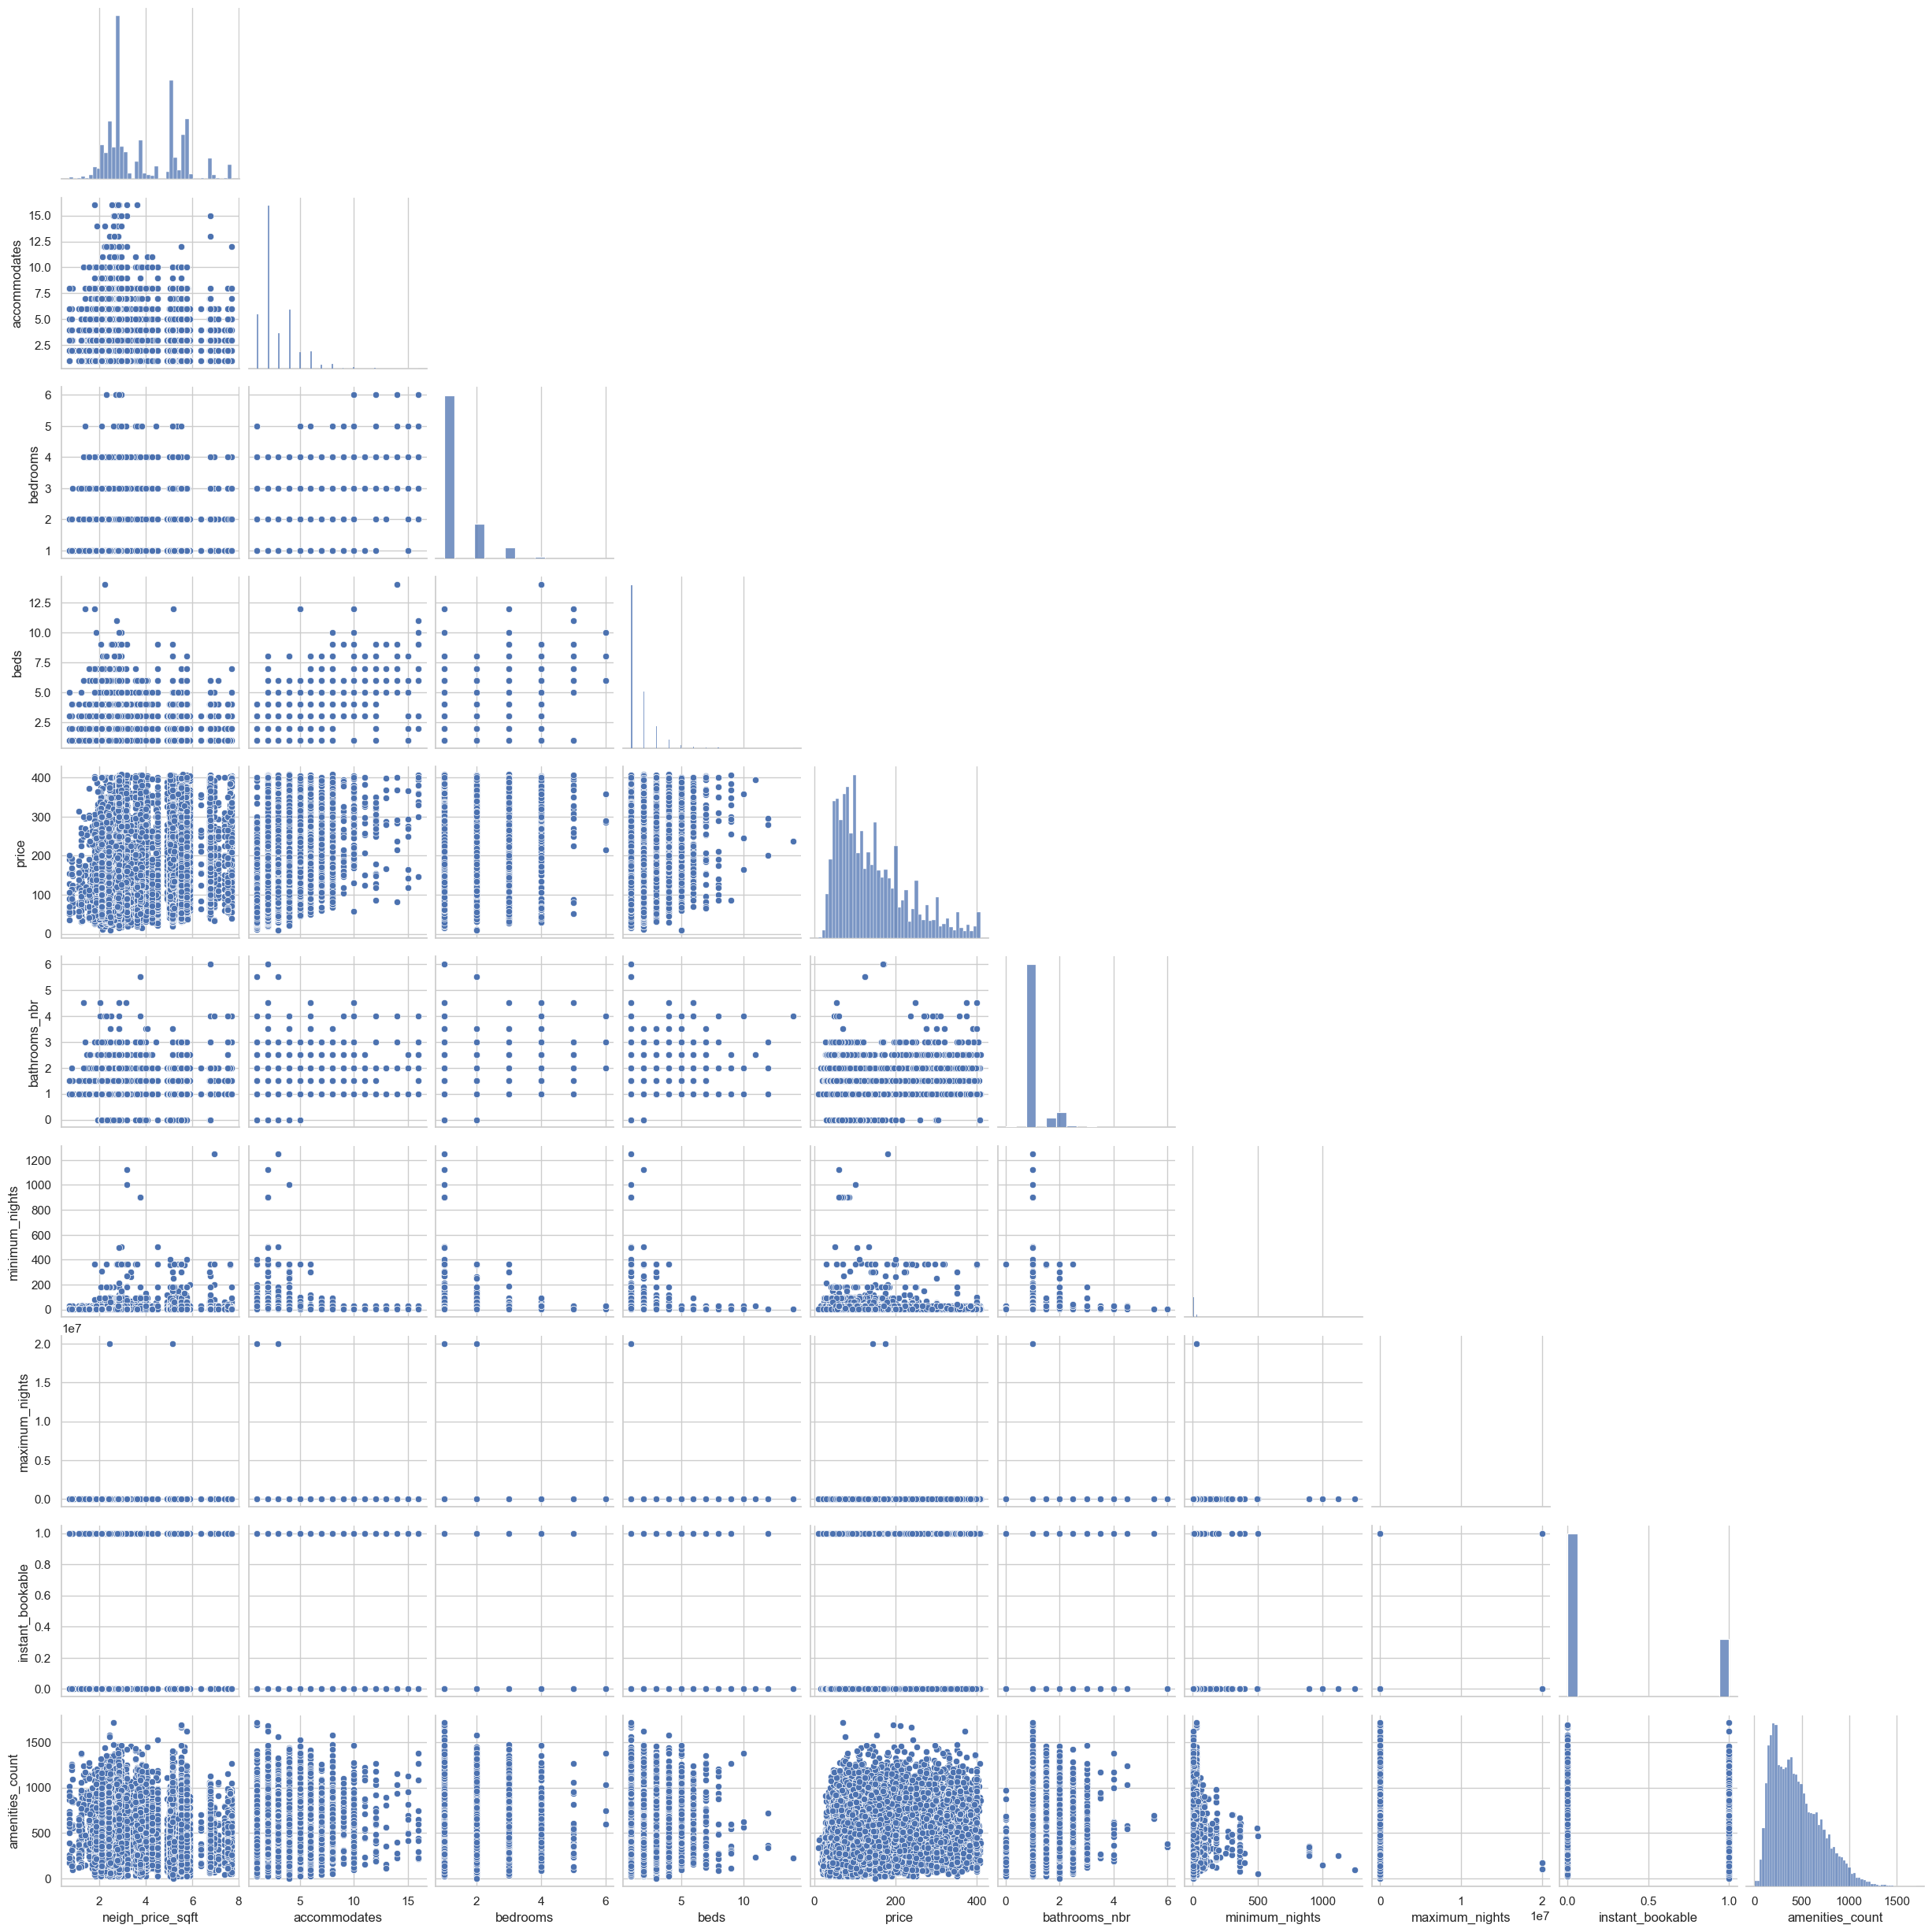

In [150]:
listing_pairs = listing[['neigh_price_sqft','accommodates','neighbourhood_group_cleansed','bedrooms', 'beds', 'price', 'bathrooms_nbr', 'minimum_nights','maximum_nights', 'instant_bookable','amenities_count']]
sns.pairplot(listing_pairs,  corner=True);

In [124]:
listing.columns

Index(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'bathrooms_type', 'bathrooms_nbr',
       'neigh_price_sqft', 'description_count', 'description_words',
       'amenities_count'],
      dtype='object')

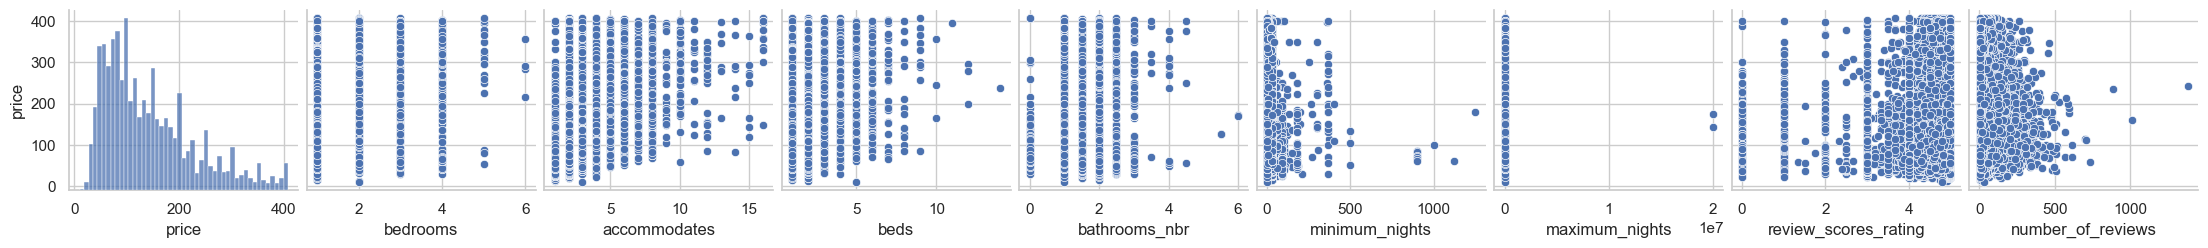

In [125]:
sns.pairplot(listing,
            x_vars = ['price','bedrooms','accommodates', 'beds', 'bathrooms_nbr', 'minimum_nights','maximum_nights','review_scores_rating', 'number_of_reviews' ],
            y_vars = ['price']);

<Figure size 1200x800 with 0 Axes>

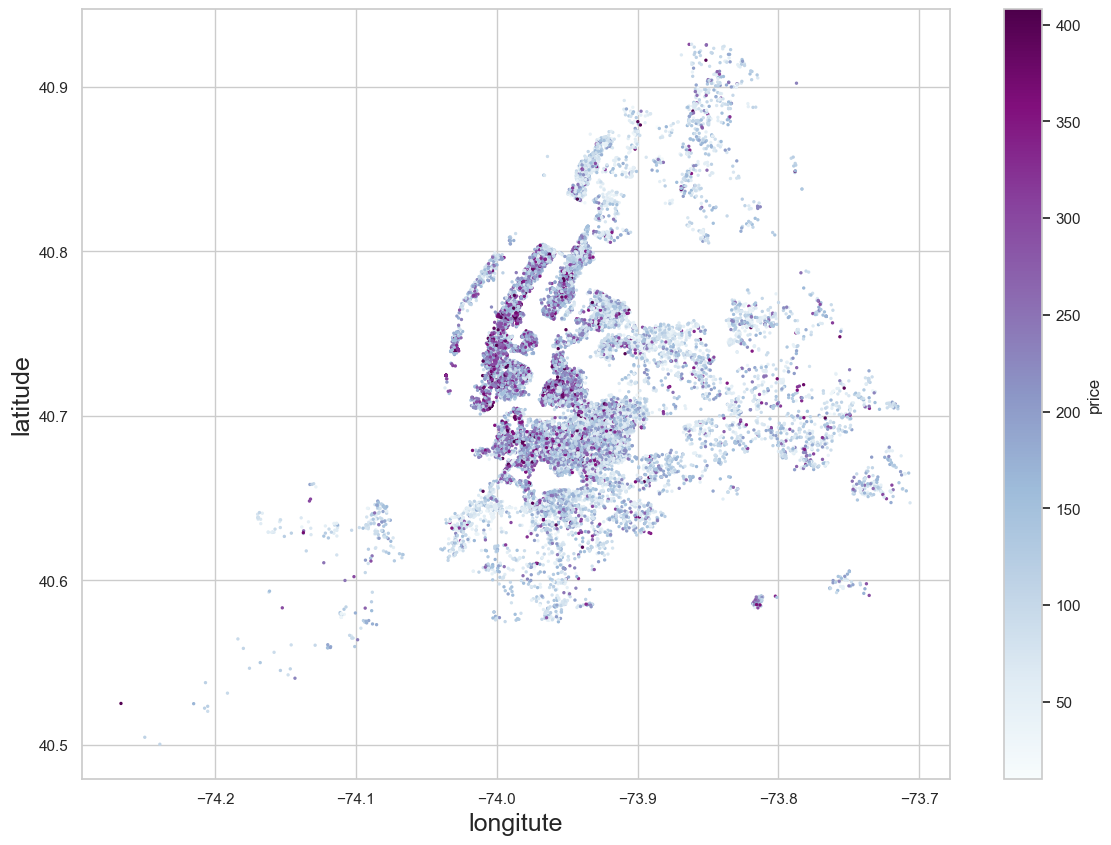

In [126]:
# Take a look at the data using a scatterplot
plt.figure(figsize=(12,8))
listing.plot(kind="scatter", x="longitude", y="latitude", c= 'price',figsize=(14,10), s=2, cmap="BuPu") #cmap="coolwarm")
plt.xlabel("longitute", fontsize=18)
plt.ylabel("latitude", fontsize=18);

Adding map using Folium

In [127]:
listing[['latitude', 'longitude']].head()

,latitude,longitude
0,40.64529,-73.97238
1,40.68535,-73.95512
3,40.66265,-73.99454
4,40.73777,-73.95366
5,40.72322,-73.98615


In [128]:
listing.columns

Index(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'bathrooms_type', 'bathrooms_nbr',
       'neigh_price_sqft', 'description_count', 'description_words',
       'amenities_count'],
      dtype='object')

In [129]:
listing['neighbourhood_cleansed']

0                kensington
1        bedford-stuyvesant
3               sunset park
4                greenpoint
5              east village
                ...        
23640              rosedale
23641        hell's kitchen
23642          west village
23643          west village
23644       upper west side
Name: neighbourhood_cleansed, Length: 22183, dtype: object

In [189]:
listing_locations = listing[['latitude', 'longitude', 'price', 'neighbourhood_cleansed']]
listing_locations = listing[listing['neighbourhood_cleansed']=='west village']

In [190]:
map = folium.Map(location=[listing_locations.latitude.mean(), listing_locations.longitude.mean()], zoom_start=14, control_scale=True,tiles='cartodb positron')#'cartodb positron'OpenStreetMap

In [191]:
for index, location_info in listing_locations.iterrows():
    folium.Marker(location = [location_info['latitude'], location_info['longitude']], popup = str(location_info['price'])).add_to(map)

In [192]:
map

In [134]:
listing.to_csv('../data/listings_model.csv', index=False, encoding='utf-8')

In [41]:
listing[['accommodates','beds','price', 'minimum_nights','review_scores_rating','bathrooms_nbr']].describe()

,accommodates,beds,price,minimum_nights,review_scores_rating,bathrooms_nbr
count,22183.000000,22183.000000,22183.000000,22183.000000,22183.000000,22183.000000
mean,2.810801,1.585899,143.863364,16.894469,4.628034,1.127102
std,1.691745,0.995302,87.521185,29.792941,0.742659,0.366368
min,1.000000,1.000000,10.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,75.000000,2.000000,4.600000,1.000000
50%,2.000000,1.000000,120.000000,6.000000,4.830000,1.000000
75%,4.000000,2.000000,194.000000,30.000000,5.000000,1.000000
max,16.000000,14.000000,408.000000,1250.000000,5.000000,6.000000
